In [ ]:
!pip install pycaret

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
station_all


,temp_o,tempd_o,rh_o,dir_o,spd_o,wind_gust_o,mslp_o,visibility_o,skyc1_o,skyc2_o,skyc3_o,skyl1_o,skyl2_o,skyl3_o,wxcodes_o,metar_o,fr_o
time,,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,278.550001,277.950000,95.91,220.0,3.601108,M,1023.0,9994.0,M,M,M,M,M,M,M,LEVX 010000Z AUTO 22007KT 9SM 05/05 A3021 RMK ...,VFR
2008-01-01 01:00:00,278.050000,277.450001,95.89,230.0,3.086664,M,NaN,NaN,M,M,M,M,M,M,M,LEVX 010100Z AUTO 23006KT 05/04 RMK SLP235 T00...,VFR
2008-01-01 02:00:00,278.050000,277.649999,97.24,190.0,5.144440,M,1022.0,9656.0,M,M,M,M,M,M,M,LEVX 010200Z AUTO 19010KT 6SM 05/04 A3018 RMK ...,VFR
2008-01-01 02:30:00,276.150001,275.149999,93.14,240.0,3.601108,M,1021.0,9656.0,M,M,M,M,M,M,M,LEVX 010230Z AUTO 24007KT 6SM 03/02 A3015 RMK ...,VFR
2008-01-01 03:00:00,278.750001,277.549999,91.98,230.0,3.086664,M,1022.0,9994.0,M,M,M,M,M,M,M,LEVX 010300Z AUTO 23006KT 9SM 06/04 A3018 RMK ...,VFR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 21:30:00,278.150000,278.150000,100.00,50.0,2.572220,M,1028.0,9994.0,M,M,M,M,M,M,M,LEVX 242130Z 05005KT 020V080 CAVOK 05/05 Q1028...,VFR
2020-12-24 22:00:00,278.150000,277.150000,93.24,60.0,2.057776,M,1028.0,9994.0,M,M,M,M,M,M,M,LEVX 242200Z 06004KT 030V110 CAVOK 05/04 Q1028...,VFR
2020-12-24 22:30:00,278.150000,277.150000,93.24,80.0,1.543332,M,1028.0,9994.0,M,M,M,M,M,M,M,LEVX 242230Z 08003KT 340V150 CAVOK 05/04 Q1028...,VFR


In [4]:
from pandas.core.algorithms import value_counts
pd.options.display.max_rows = 999
#station.value_counts()
station=station_all[["temp_o","wxcodes_o"]].astype(str)
station["wxcodes_o"].value_counts(dropna=True,normalize=True)

M                 0.814456
BCFG              0.046308
FG                0.020785
BR                0.014783
-RA               0.013204
VCFG              0.008877
RA                0.008567
-RA BCFG          0.006626
RA BCFG           0.005710
SHRA              0.003612
-RA BR            0.003477
RA BR             0.003149
BCFG -RA          0.002875
-RA FG            0.002848
BCFG RA           0.002595
-DZ               0.002578
-DZ BCFG          0.002543
RA FG             0.002386
PRFG              0.002329
DZ                0.001972
BCFG DZ           0.001740
BCFG -DZ          0.001740
DZ BCFG           0.001714
-DZ FG            0.001348
FG DZ             0.001309
-DZ BR            0.001243
-SHRA             0.001243
BR BCFG           0.001016
FG -DZ            0.000999
FG -RA            0.000990
DZ FG             0.000925
DZ BR             0.000872
FG RA             0.000776
VCSH              0.000563
-RADZ BCFG        0.000506
-RA VCFG          0.000502
BR RA             0.000489
B

In [5]:
station["prec_l"]="No RA/DZ"
mask=station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]]="RA/DZ"
mask=station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]]= "RA/DZ"
station=station.drop(columns=["temp_o"])
print(station.value_counts())
print(station.sample(40))

wxcodes_o       prec_l  
M               No RA/DZ    186714
BCFG            No RA/DZ     10616
FG              No RA/DZ      4765
BR              No RA/DZ      3389
-RA             RA/DZ         3027
VCFG            No RA/DZ      2035
RA              RA/DZ         1964
-RA BCFG        RA/DZ         1519
RA BCFG         RA/DZ         1309
SHRA            RA/DZ          828
-RA BR          RA/DZ          797
RA BR           RA/DZ          722
BCFG -RA        RA/DZ          659
-RA FG          RA/DZ          653
BCFG RA         RA/DZ          595
-DZ             RA/DZ          591
-DZ BCFG        RA/DZ          583
RA FG           RA/DZ          547
PRFG            No RA/DZ       534
DZ              RA/DZ          452
BCFG DZ         RA/DZ          399
BCFG -DZ        RA/DZ          399
DZ BCFG         RA/DZ          393
-DZ FG          RA/DZ          309
FG DZ           RA/DZ          300
-DZ BR          RA/DZ          285
-SHRA           RA/DZ          285
BR BCFG         No RA/DZ      

**climate change**

In [8]:
station.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229250 entries, 2008-01-01 00:00:00 to 2020-12-24 23:30:00
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   wxcodes_o  229250 non-null  object
 1   prec_l     229250 non-null  object
dtypes: object(2)
memory usage: 5.2+ MB


In [6]:
station["prec_l"].value_counts(normalize=True)

No RA/DZ    0.910957
RA/DZ       0.089043
Name: prec_l, dtype: float64

In [7]:
station["prec_l"][50000:].value_counts(normalize=True)

No RA/DZ    0.88612
RA/DZ       0.11388
Name: prec_l, dtype: float64

In [9]:
station["prec_l"][100000:].value_counts(normalize=True)

No RA/DZ    0.872046
RA/DZ       0.127954
Name: prec_l, dtype: float64

In [18]:
station["prec_l"][150000:].value_counts(normalize=True)

No RA/DZ    0.881565
RA/DZ       0.118435
Name: prec_l, dtype: float64

In [12]:
station[150000:].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79250 entries, 2016-07-28 07:00:00 to 2020-12-24 23:30:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   wxcodes_o  79250 non-null  object
 1   prec_l     79250 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


**Forecast D1**

In [98]:
#ria forecast d1
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD1.csv",parse_dates=["time"]).set_index("time")
model4k.columns

Index(['dir0', 'mod0', 'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0',
       'lhflx0', 'lwflx0', 'conv_prec0',
       ...
       'cape9', 'cin9', 'cfh9', 'cfl9', 'cfm9', 'cft9', 'HGT5009', 'HGT8509',
       'T5009', 'T8509'],
      dtype='object', length=230)

In [99]:
#label meteorological model prec points 0 to 9

interval=pd.IntervalIndex.from_tuples([(-1, 0.1), (0.1, 50000)])
labels=["No RA/DZ","RA/DZ"]
model4k["prec0_l"]=pd.cut(model4k["prec0"], bins=interval,retbins=False,labels=labels)

In [100]:
#label meteorological model prec points 0 to 9
interval=pd.IntervalIndex.from_tuples([(-1, 0.1), (0.1, 50000)])
labels=["No RA/DZ","RA/DZ"]
model4k["prec0_l"]=pd.cut(model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec1_l"]=pd.cut(model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec2_l"]=pd.cut(model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec3_l"]=pd.cut(model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec4_l"]=pd.cut(model4k["prec4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec5_l"]=pd.cut(model4k["prec5"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec6_l"]=pd.cut(model4k["prec6"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)




In [101]:
#concat station model last years
df_all4k=pd.concat([station,model4k],axis=1)[75000:].dropna()
df_all4k=df_all4k.drop(columns=["wxcodes_o"])
df_all4k[["prec_l","prec0_l","prec1_l"]].sample(20)

,prec_l,prec0_l,prec1_l
time,,,
2018-09-03 13:00:00,No RA/DZ,RA/DZ,RA/DZ
2014-05-27 11:00:00,No RA/DZ,RA/DZ,RA/DZ
2020-06-08 18:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2017-11-18 08:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2013-08-15 11:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2014-02-01 01:00:00,RA/DZ,No RA/DZ,No RA/DZ
2015-06-28 07:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2016-12-13 05:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2012-05-26 19:00:00,No RA/DZ,No RA/DZ,No RA/DZ


In [102]:
print("station\n",df_all4k["prec_l"].value_counts(normalize=True))
print("point 0\n",df_all4k["prec0_l"].value_counts(normalize=True))
print("point 1\n",df_all4k["prec1_l"].value_counts(normalize=True))
print("point 2\n",df_all4k["prec2_l"].value_counts(normalize=True))
print("point 3\n",df_all4k["prec3_l"].value_counts(normalize=True))
print("point 4\n",df_all4k["prec4_l"].value_counts(normalize=True))
print("point 5\n",df_all4k["prec5_l"].value_counts(normalize=True))


station
 No RA/DZ    0.890603
RA/DZ       0.109397
Name: prec_l, dtype: float64
point 0
 No RA/DZ    0.780799
RA/DZ       0.219201
Name: prec0_l, dtype: float64
point 1
 No RA/DZ    0.794948
RA/DZ       0.205052
Name: prec1_l, dtype: float64
point 2
 No RA/DZ    0.799031
RA/DZ       0.200969
Name: prec2_l, dtype: float64
point 3
 No RA/DZ    0.798801
RA/DZ       0.201199
Name: prec3_l, dtype: float64
point 4
 No RA/DZ    0.794839
RA/DZ       0.205161
Name: prec4_l, dtype: float64
point 5
 No RA/DZ    0.808066
RA/DZ       0.191934
Name: prec5_l, dtype: float64


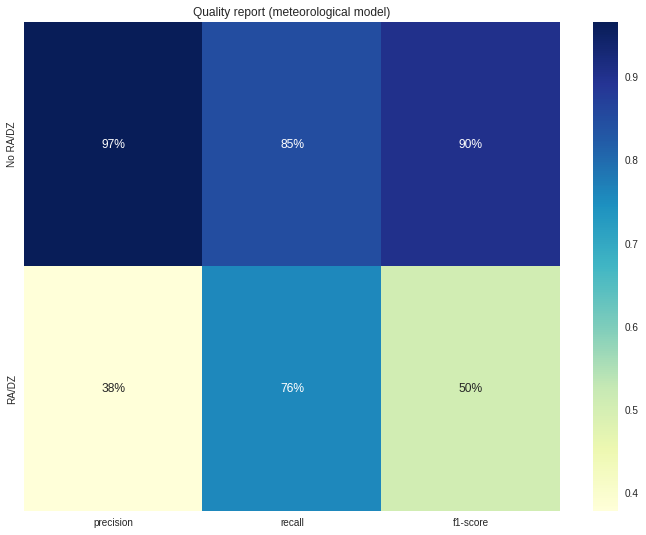

In [103]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Quality report (meteorological model)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


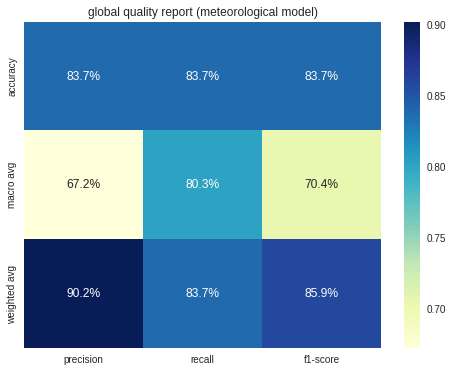

In [104]:
plt.figure(figsize=(8, 6))
plt.title("global quality report (meteorological model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

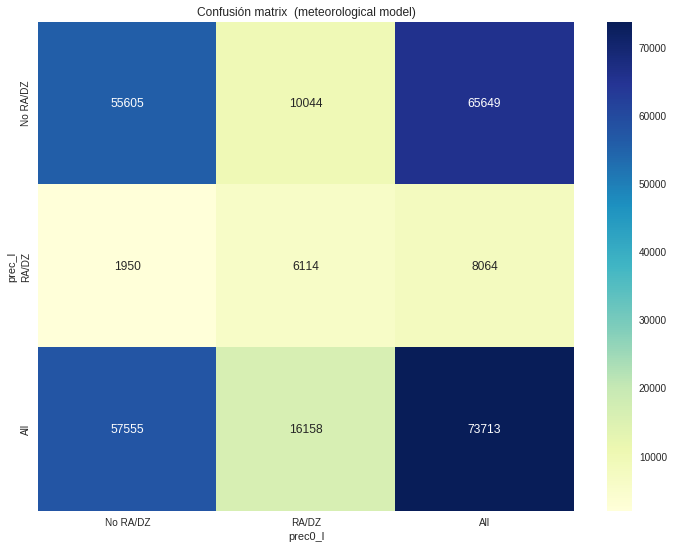

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusión matrix  (meteorological model)")

global_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

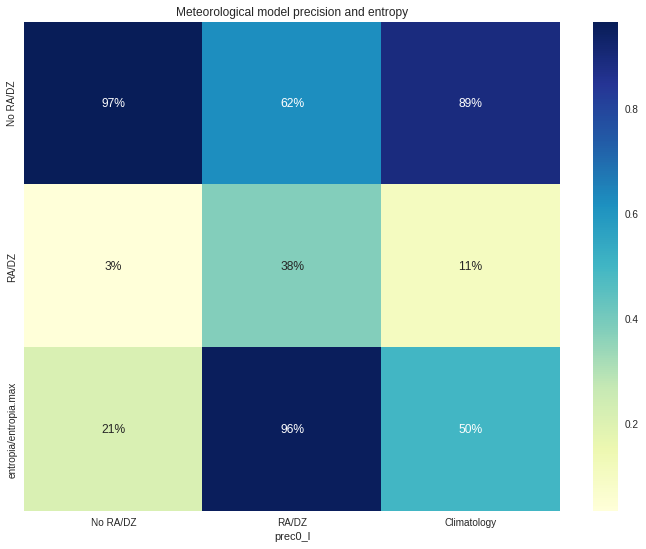

In [106]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Meteorological model precision and entropy")
column_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Forecast D0**

In [88]:
#ria forecast d0
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD0.csv",parse_dates=["time"]).set_index("time")
model4k.columns

Index(['dir0', 'mod0', 'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0',
       'lhflx0', 'lwflx0', 'conv_prec0',
       ...
       'cape9', 'cin9', 'cfh9', 'cfl9', 'cfm9', 'cft9', 'HGT5009', 'HGT8509',
       'T5009', 'T8509'],
      dtype='object', length=230)

In [89]:
#label meteorological model prec points 0 to 9

interval=pd.IntervalIndex.from_tuples([(-1, 0.1), (0.1, 50000)])
labels=["No RA/DZ","RA/DZ"]
model4k["prec0_l"]=pd.cut(model4k["prec0"], bins=interval,retbins=False,labels=labels)



In [90]:
#label meteorological model prec points 0 to 9
interval=pd.IntervalIndex.from_tuples([(-1, 0.1), (0.1, 50000)])
labels=["No RA/DZ","RA/DZ"]
model4k["prec0_l"]=pd.cut(model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec1_l"]=pd.cut(model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec2_l"]=pd.cut(model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec3_l"]=pd.cut(model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec4_l"]=pd.cut(model4k["prec4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec5_l"]=pd.cut(model4k["prec5"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec6_l"]=pd.cut(model4k["prec6"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

In [91]:
#concat station model
df_all4k=pd.concat([station,model4k],axis=1)[75000:].dropna()
df_all4k=df_all4k.drop(columns=["wxcodes_o"])
df_all4k[["prec_l","prec0_l","prec1_l"]].sample(20)

,prec_l,prec0_l,prec1_l
time,,,
2017-05-27 02:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2013-06-03 18:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2020-07-03 05:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2016-06-21 07:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2014-02-17 07:00:00,RA/DZ,RA/DZ,RA/DZ
2013-08-31 04:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2017-12-22 18:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2020-09-07 15:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2012-09-09 14:00:00,No RA/DZ,No RA/DZ,No RA/DZ


In [92]:
print("station\n",df_all4k["prec_l"].value_counts(normalize=True))
print("point 0\n",df_all4k["prec0_l"].value_counts(normalize=True))
print("point 1\n",df_all4k["prec1_l"].value_counts(normalize=True))
print("point 2\n",df_all4k["prec2_l"].value_counts(normalize=True))
print("point 3\n",df_all4k["prec3_l"].value_counts(normalize=True))
print("point 4\n",df_all4k["prec4_l"].value_counts(normalize=True))
print("point 5\n",df_all4k["prec5_l"].value_counts(normalize=True))

station
 No RA/DZ    0.89059
RA/DZ       0.10941
Name: prec_l, dtype: float64
point 0
 No RA/DZ    0.791163
RA/DZ       0.208837
Name: prec0_l, dtype: float64
point 1
 No RA/DZ    0.803554
RA/DZ       0.196446
Name: prec1_l, dtype: float64
point 2
 No RA/DZ    0.807477
RA/DZ       0.192523
Name: prec2_l, dtype: float64
point 3
 No RA/DZ    0.808865
RA/DZ       0.191135
Name: prec3_l, dtype: float64
point 4
 No RA/DZ    0.802379
RA/DZ       0.197621
Name: prec4_l, dtype: float64
point 5
 No RA/DZ    0.814643
RA/DZ       0.185357
Name: prec5_l, dtype: float64


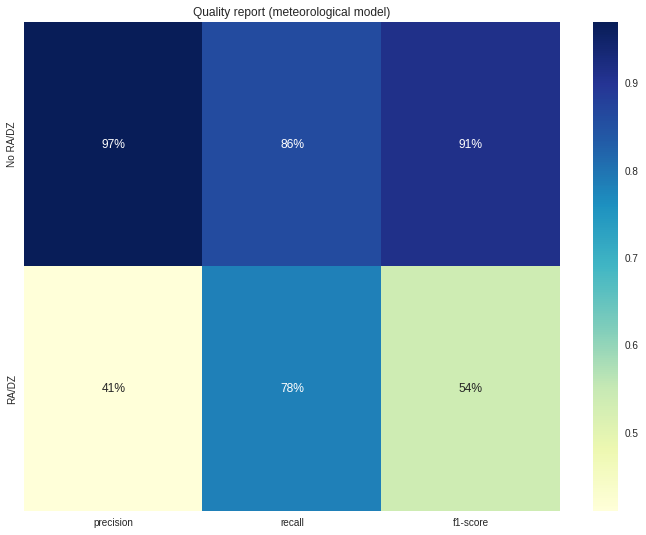

In [93]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Quality report (meteorological model)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


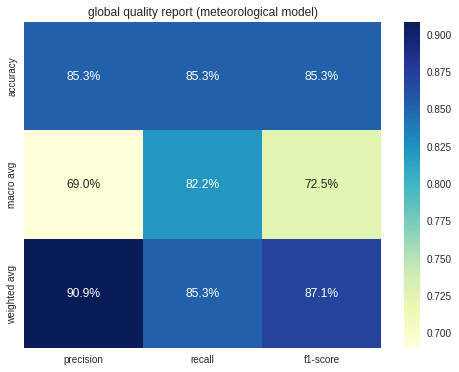

In [94]:
plt.figure(figsize=(8, 6))
plt.title("global quality report (meteorological model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

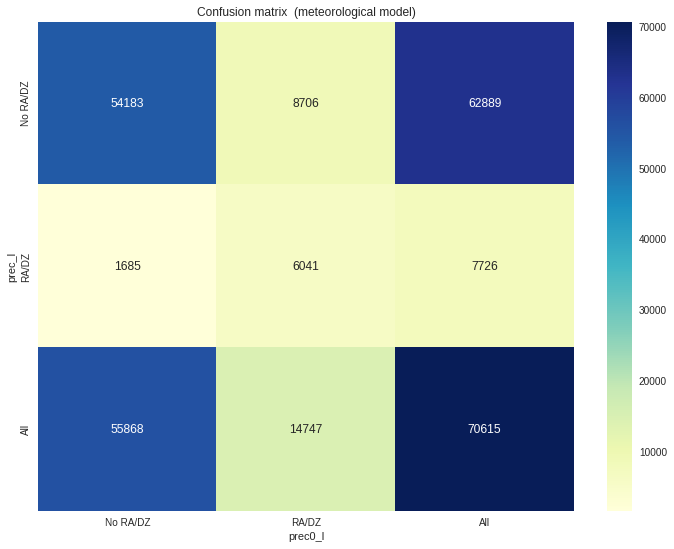

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix  (meteorological model)")

global_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

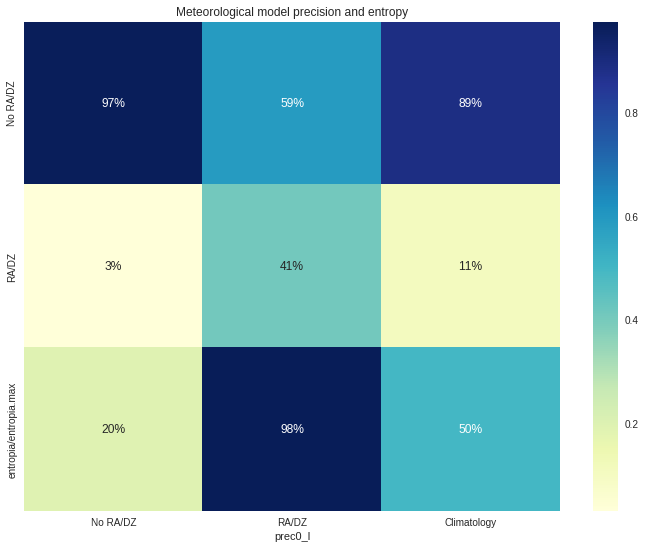

In [97]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Meteorological model precision and entropy")
column_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Forecast d2**

In [122]:
#ria forecast d0
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD2.csv",parse_dates=["time"]).set_index("time")
model4k.columns

Index(['dir0', 'mod0', 'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0',
       'lhflx0', 'lwflx0', 'conv_prec0',
       ...
       'cape9', 'cin9', 'cfh9', 'cfl9', 'cfm9', 'cft9', 'HGT5009', 'HGT8509',
       'T5009', 'T8509'],
      dtype='object', length=230)

In [123]:
#label meteorological model prec points 0 to 9
interval=pd.IntervalIndex.from_tuples([(-1, 0.1), (0.1, 50000)])
labels=["No RA/DZ","RA/DZ"]
model4k["prec0_l"]=pd.cut(model4k["prec0"], bins=interval,retbins=False,labels=labels)

#label meteorological model prec points 0 to 9
interval=pd.IntervalIndex.from_tuples([(-1, 0.1), (0.1, 50000)])
labels=["No RA/DZ","RA/DZ"]
model4k["prec0_l"]=pd.cut(model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec1_l"]=pd.cut(model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec2_l"]=pd.cut(model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec3_l"]=pd.cut(model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec4_l"]=pd.cut(model4k["prec4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec5_l"]=pd.cut(model4k["prec5"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec6_l"]=pd.cut(model4k["prec6"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#concat station model
df_all4k=pd.concat([station,model4k],axis=1)[75000:].dropna()
df_all4k=df_all4k.drop(columns=["wxcodes_o"])
df_all4k[["prec_l","prec0_l","prec1_l"]].sample(20)



,prec_l,prec0_l,prec1_l
time,,,
2014-10-23 20:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2015-05-18 03:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2017-07-02 15:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2015-04-01 05:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2017-05-30 20:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2012-09-27 02:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2013-10-06 10:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2016-01-30 18:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2015-06-13 09:00:00,No RA/DZ,No RA/DZ,No RA/DZ


In [124]:
print("station\n",df_all4k["prec_l"].value_counts(normalize=True))
print("point 0\n",df_all4k["prec0_l"].value_counts(normalize=True))
print("point 1\n",df_all4k["prec1_l"].value_counts(normalize=True))
print("point 2\n",df_all4k["prec2_l"].value_counts(normalize=True))
print("point 3\n",df_all4k["prec3_l"].value_counts(normalize=True))
print("point 4\n",df_all4k["prec4_l"].value_counts(normalize=True))
print("point 5\n",df_all4k["prec5_l"].value_counts(normalize=True))

station
 No RA/DZ    0.890598
RA/DZ       0.109402
Name: prec_l, dtype: float64
point 0
 No RA/DZ    0.786352
RA/DZ       0.213648
Name: prec0_l, dtype: float64
point 1
 No RA/DZ    0.799593
RA/DZ       0.200407
Name: prec1_l, dtype: float64
point 2
 No RA/DZ    0.803066
RA/DZ       0.196934
Name: prec2_l, dtype: float64
point 3
 No RA/DZ    0.80175
RA/DZ       0.19825
Name: prec3_l, dtype: float64
point 4
 No RA/DZ    0.797531
RA/DZ       0.202469
Name: prec4_l, dtype: float64
point 5
 No RA/DZ    0.810704
RA/DZ       0.189296
Name: prec5_l, dtype: float64


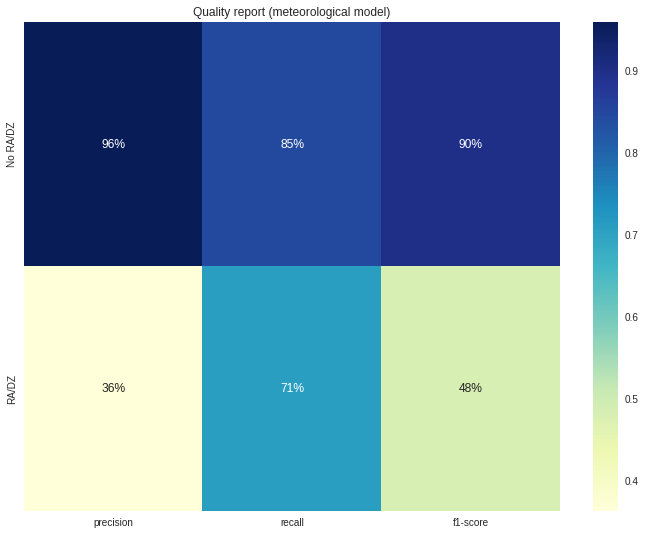

In [125]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Quality report (meteorological model)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

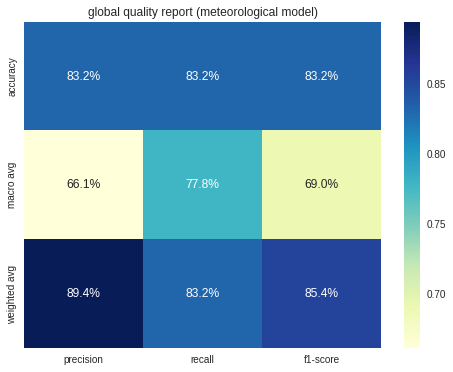

In [126]:
plt.figure(figsize=(8, 6))
plt.title("global quality report (meteorological model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

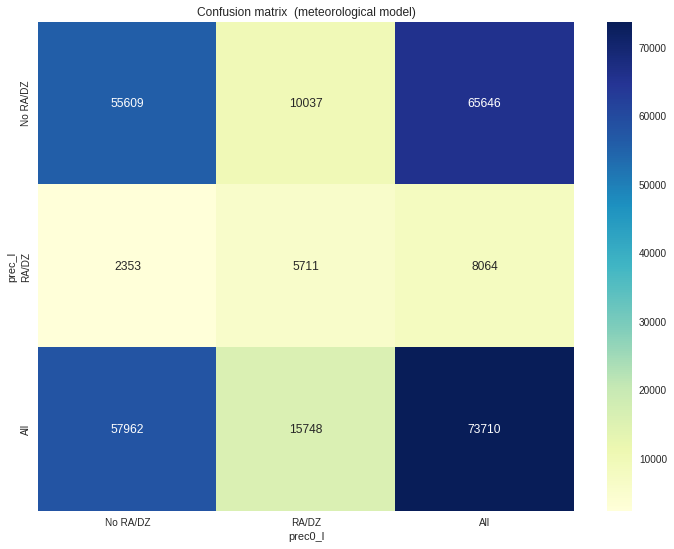

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix  (meteorological model)")

global_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

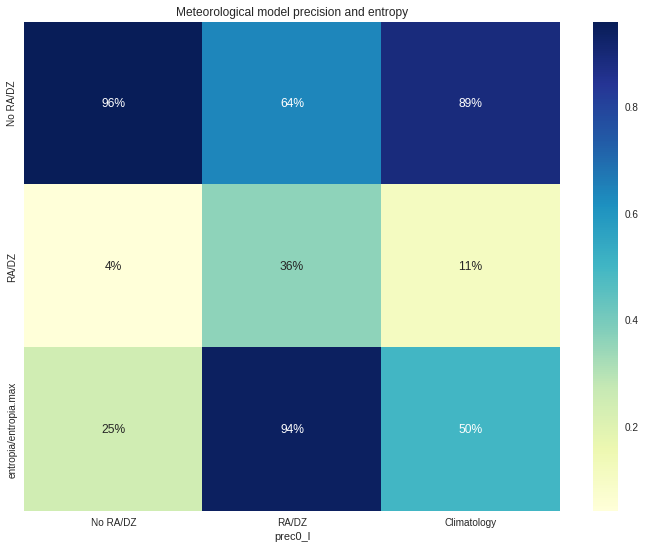

In [128]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Meteorological model precision and entropy")
column_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**machine learning d0, d1 or d2**

In [129]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k.drop(columns=["prec0_l","prec1_l","prec2_l",
                                    "prec3_l","prec4_l","prec5_l",
                                    "prec6_l"]),
             target = 'prec_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.25,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

              

,Description,Value
0,session_id,20
1,Target,prec_l
2,Target Type,Binary
3,Label Encoded,"No RA/DZ: 0, RA/DZ: 1"
4,Original Data,"(73710, 231)"
5,Missing Values,False
6,Numeric Features,230
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [55]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9184,0.9313,0.4355,0.7079,0.5392,0.4972,0.5149,4.814
rf,Random Forest Classifier,0.9177,0.9293,0.4258,0.7070,0.5314,0.4893,0.5083,16.174
lightgbm,Light Gradient Boosting Machine,0.9165,0.9312,0.4300,0.6921,0.5303,0.4873,0.5040,0.964
gbc,Gradient Boosting Classifier,0.9159,0.9285,0.4309,0.6855,0.5291,0.4856,0.5014,22.556
lda,Linear Discriminant Analysis,0.8973,0.9094,0.5230,0.5321,0.5275,0.4699,0.4699,0.194
ada,Ada Boost Classifier,0.9100,0.9203,0.4375,0.6288,0.5158,0.4679,0.4774,4.760
nb,Naive Bayes,0.8595,0.8918,0.6786,0.4142,0.5144,0.4378,0.4561,0.092
qda,Quadratic Discriminant Analysis,0.8534,0.8812,0.6905,0.4020,0.5081,0.4290,0.4507,0.124
knn,K Neighbors Classifier,0.9012,0.8460,0.4068,0.5694,0.4745,0.4216,0.4289,7.760
dt,Decision Tree Classifier,0.8812,0.7046,0.4785,0.4600,0.4690,0.4022,0.4023,1.138


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=20, verbose=0,
                     warm_start=False)

In [130]:
model=create_model("lightgbm",n_estimators=200,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9068,0.9035,0.3143,0.6626,0.4263,0.3825,0.4143
1,0.9039,0.9037,0.3049,0.6331,0.4115,0.3661,0.3953
2,0.9038,0.9047,0.3382,0.6161,0.4367,0.3889,0.4099
3,0.9059,0.9051,0.3208,0.6477,0.4291,0.3841,0.4124
4,0.9031,0.9000,0.3049,0.6237,0.4095,0.3635,0.3913
Mean,0.9047,0.9034,0.3166,0.6366,0.4226,0.3770,0.4046
Std,0.0014,0.0018,0.0124,0.0167,0.0105,0.0102,0.0095


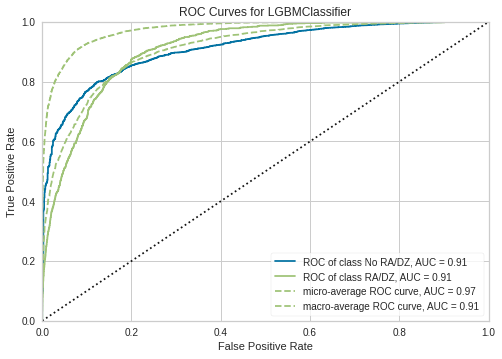

In [131]:
plot_model(model, plot = 'auc')

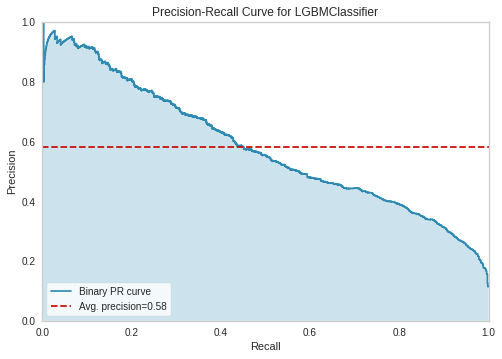

In [132]:
plot_model(model, plot = 'pr')

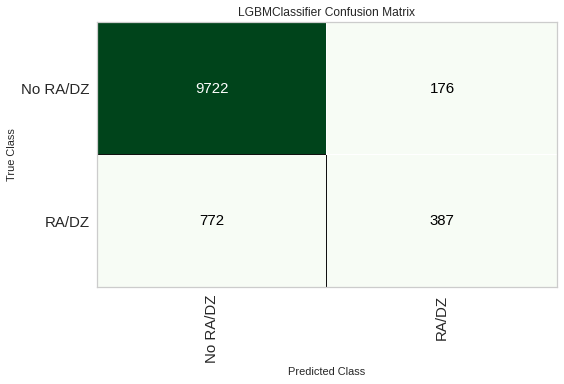

In [133]:
plot_model(model,'confusion_matrix')

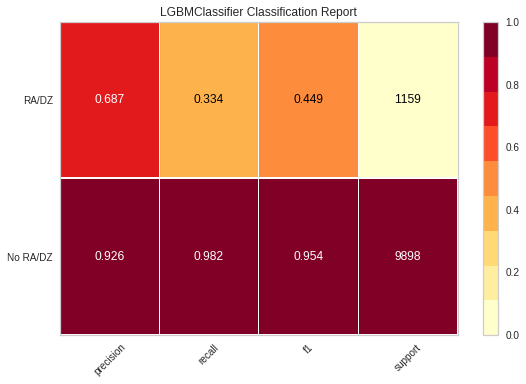

In [134]:
plot_model(model,'class_report')

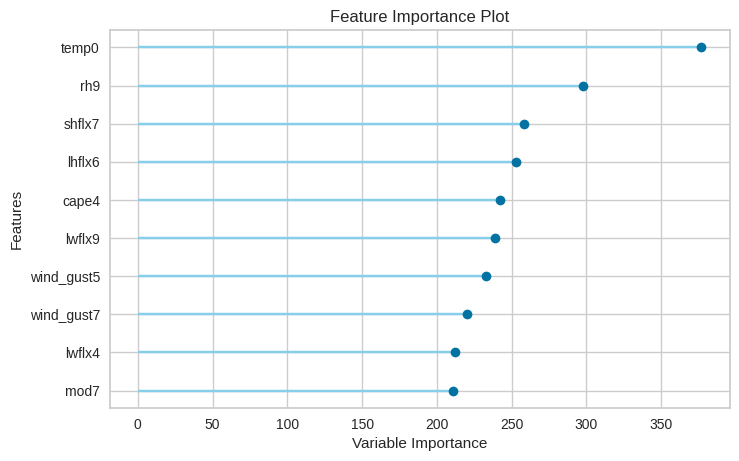

In [135]:
plot_model(model,"feature")

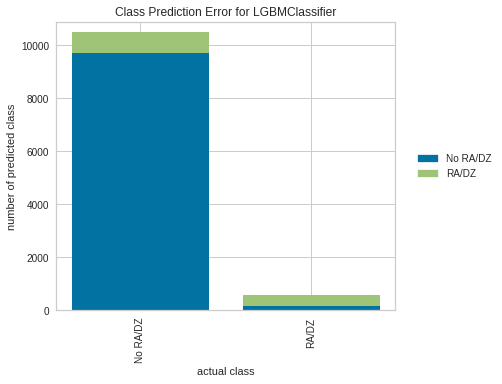

In [136]:
plot_model(model,"error")

**Export model**

In [137]:
x_var=get_config("X_train").columns
x_var

Index(['cin2', 'cft3', 'temp0', 'dir3', 'visibility7', 'lwflx4', 'dir5',
       'shflx7', 'cfl0', 'cft0', 'rh9', 'cfl4', 'lhflx6', 'mod7', 'dir0',
       'cin4', 'mod5', 'cape9', 'wind_gust5', 'cin5', 'cfl3', 'wind_gust7',
       'visibility5', 'dir6', 'cin9', 'dir9', 'lwflx9', 'dir7', 'cape4',
       'visibility1', 'mod2'],
      dtype='object')

In [138]:
#define x and y
Y=df_all4k.prec_l
X=df_all4k[x_var]

In [139]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
ml_model=LGBMClassifier(n_estimators=200).fit(X_train,y_train)


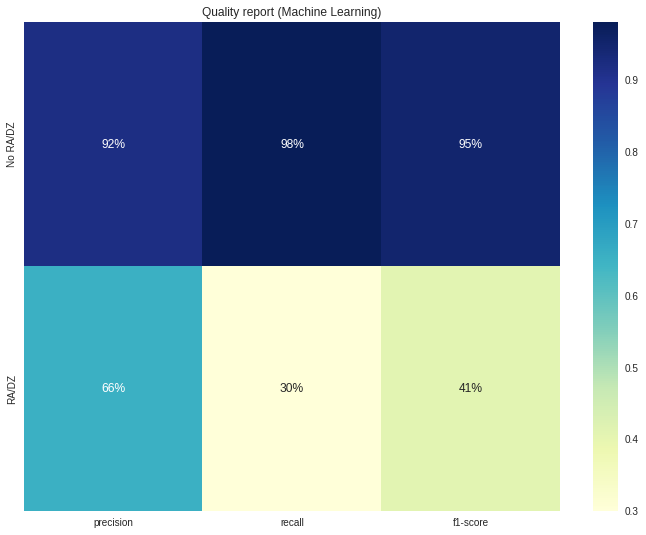

In [140]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


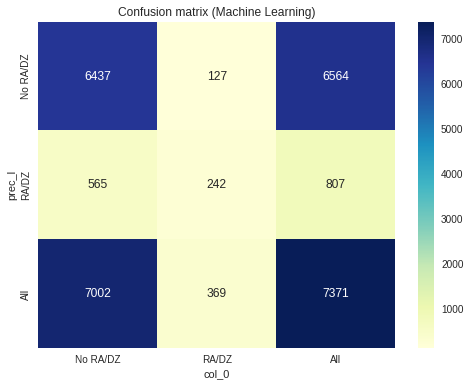

In [141]:
plt.figure(figsize=(8, 6))
plt.title("Confusion matrix (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

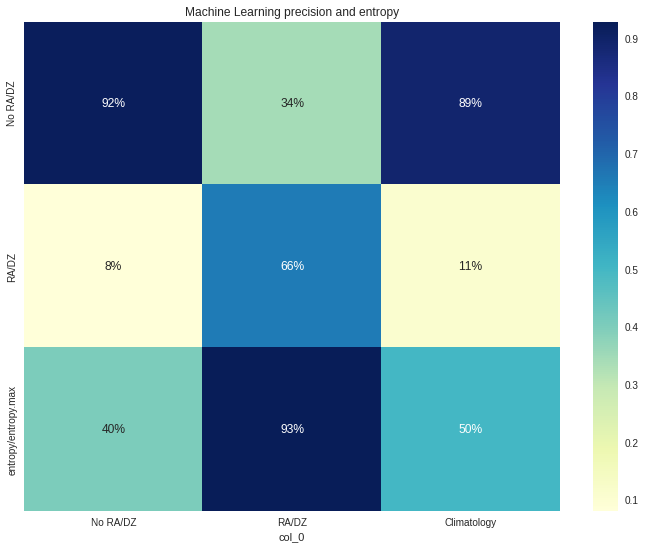

In [145]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Machine Learning precision and entropy")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [143]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("prec_LEVX_d2.al", 'wb'))